This problem looks at how a drag force affects a projectile's trajectory. I couldn't figure out how to resize my images, so here you go.

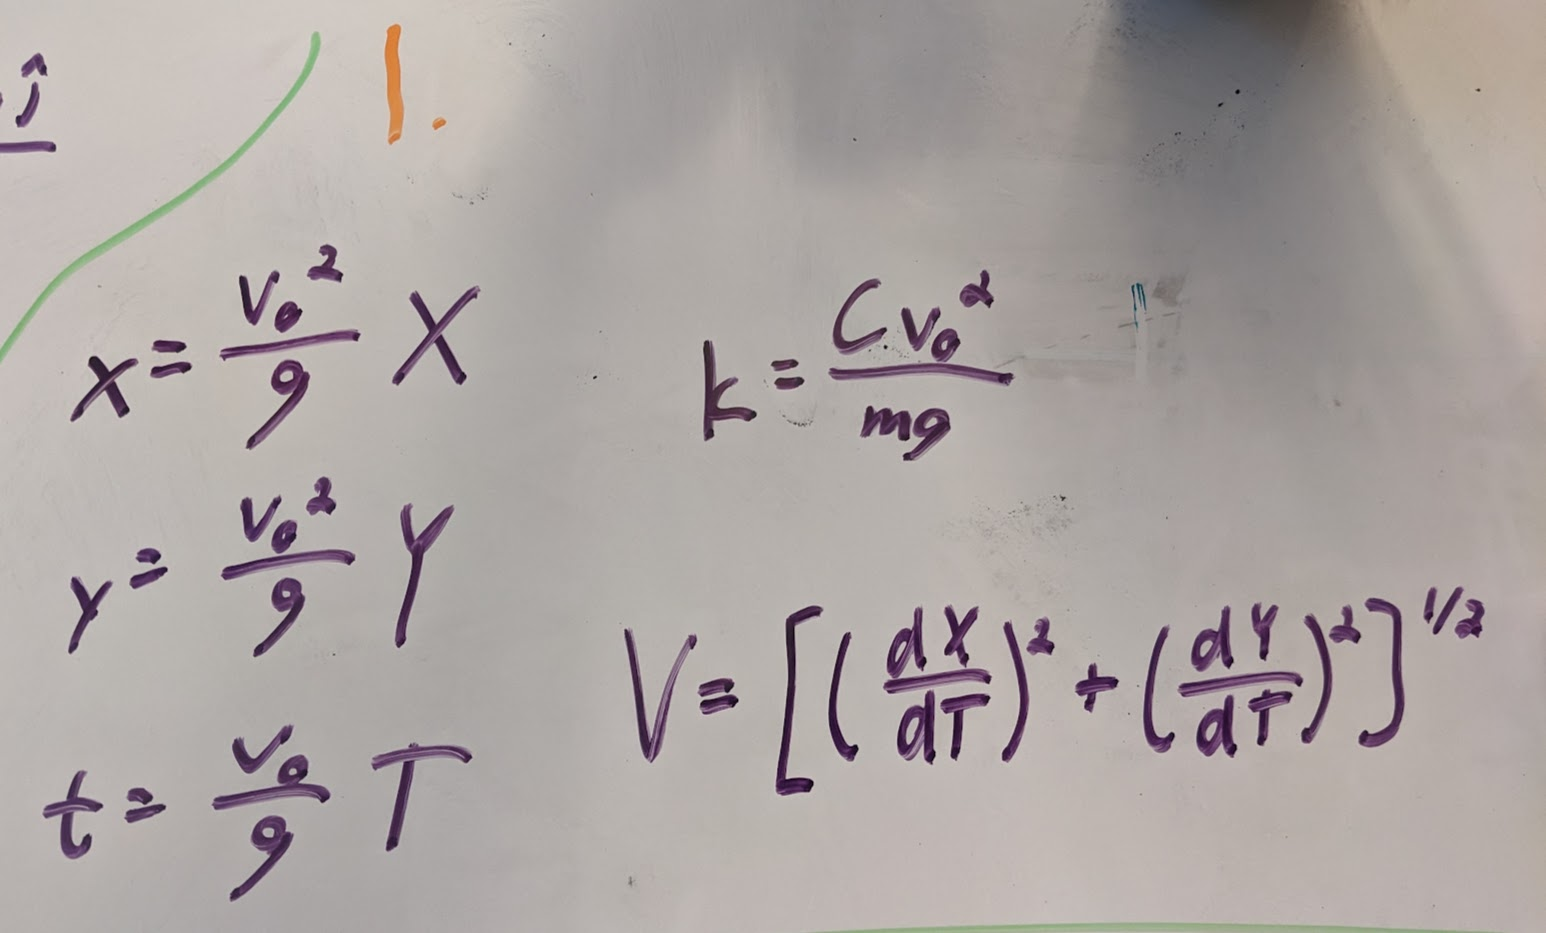

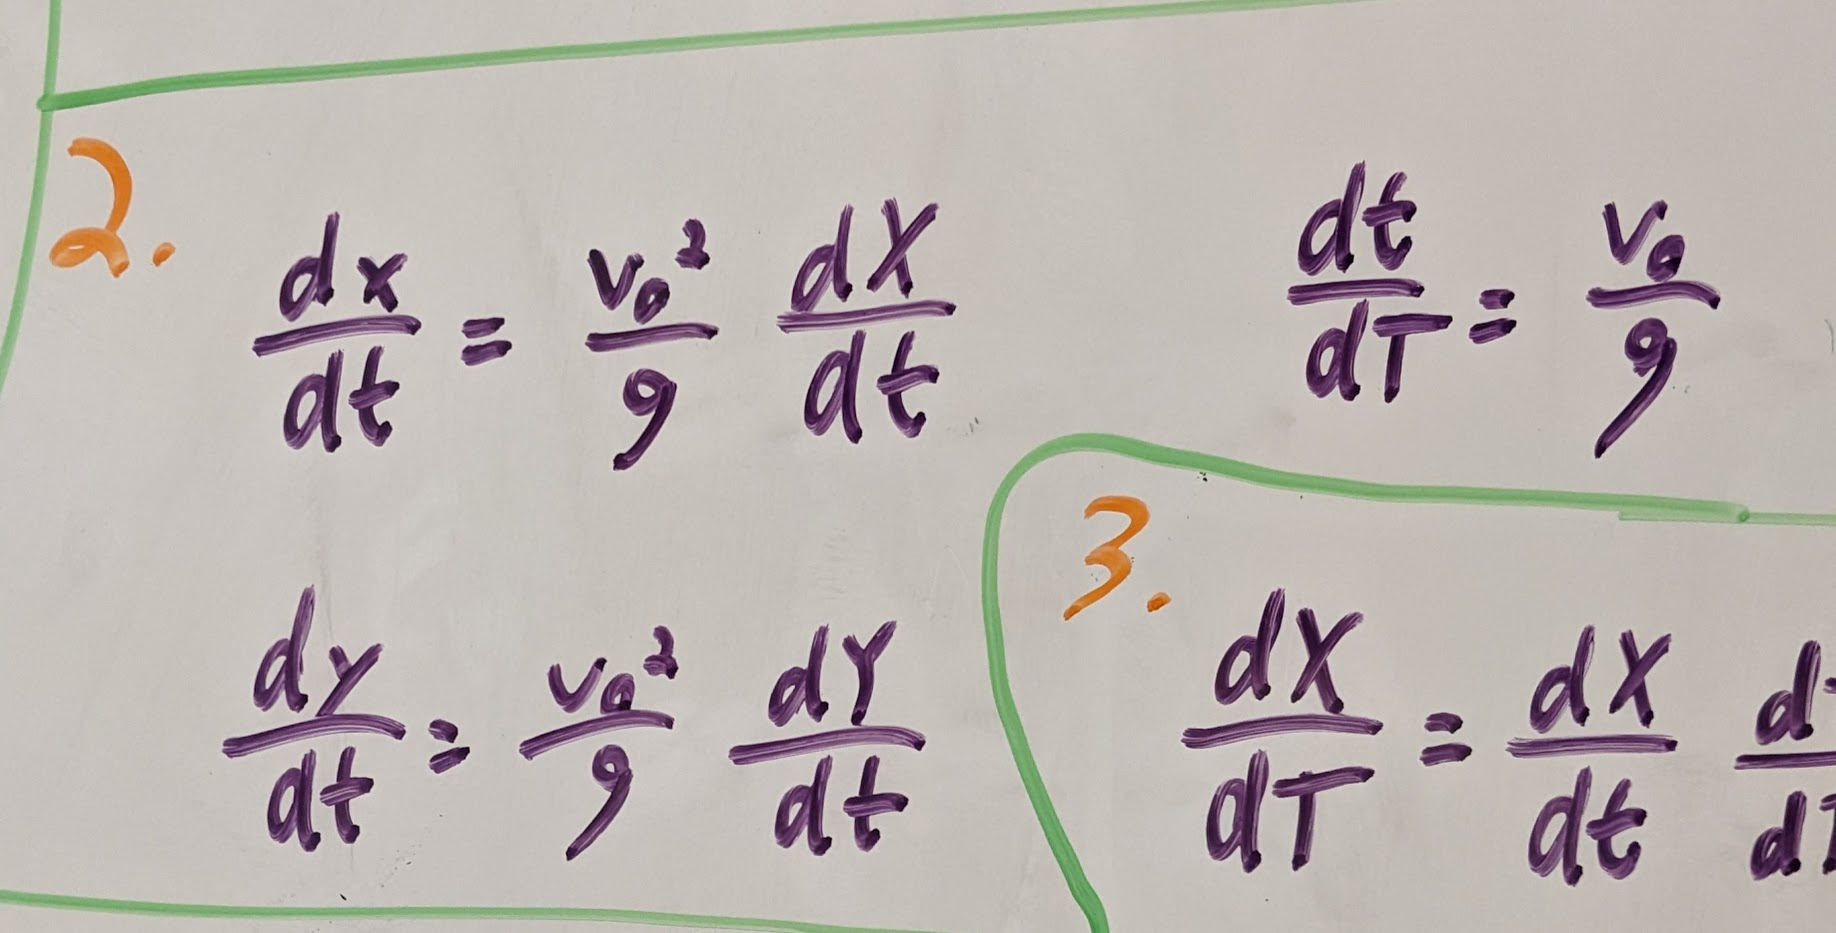

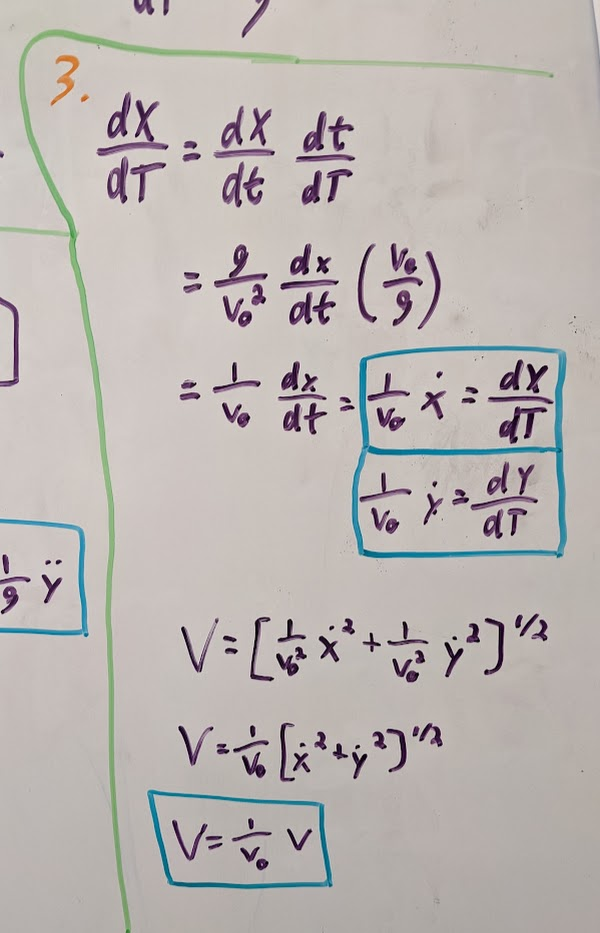

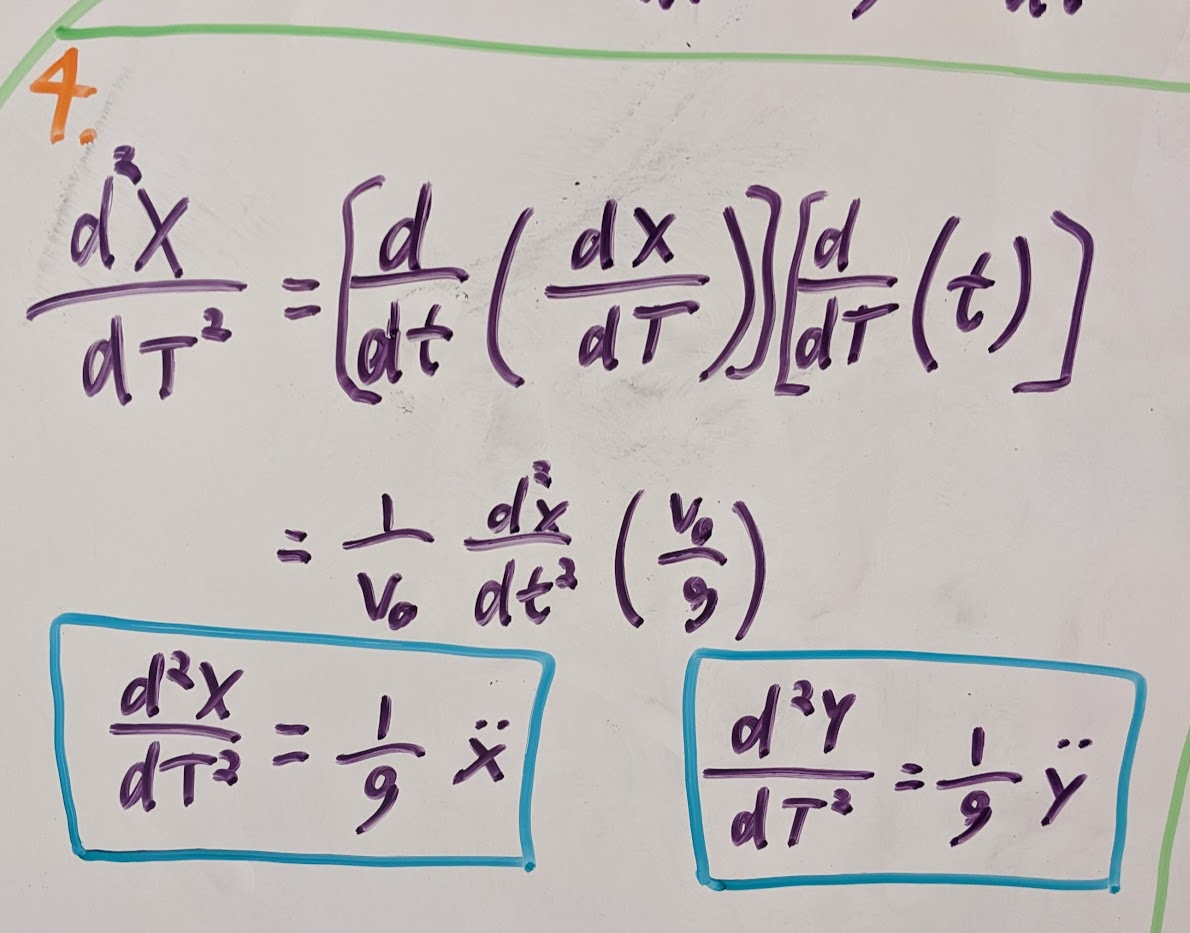

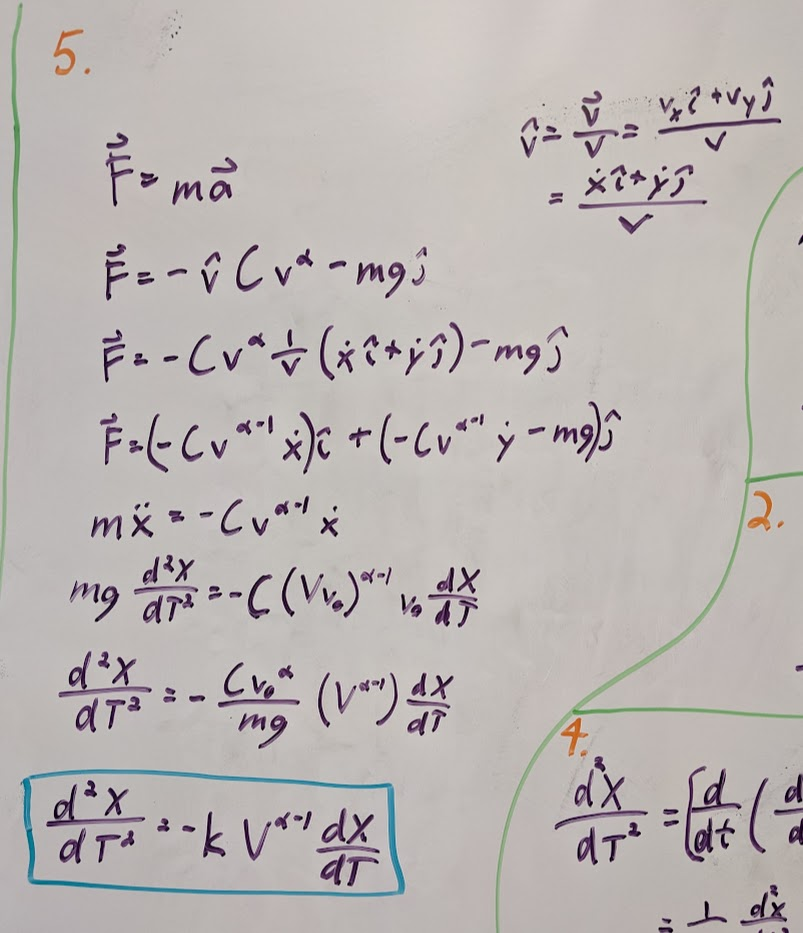

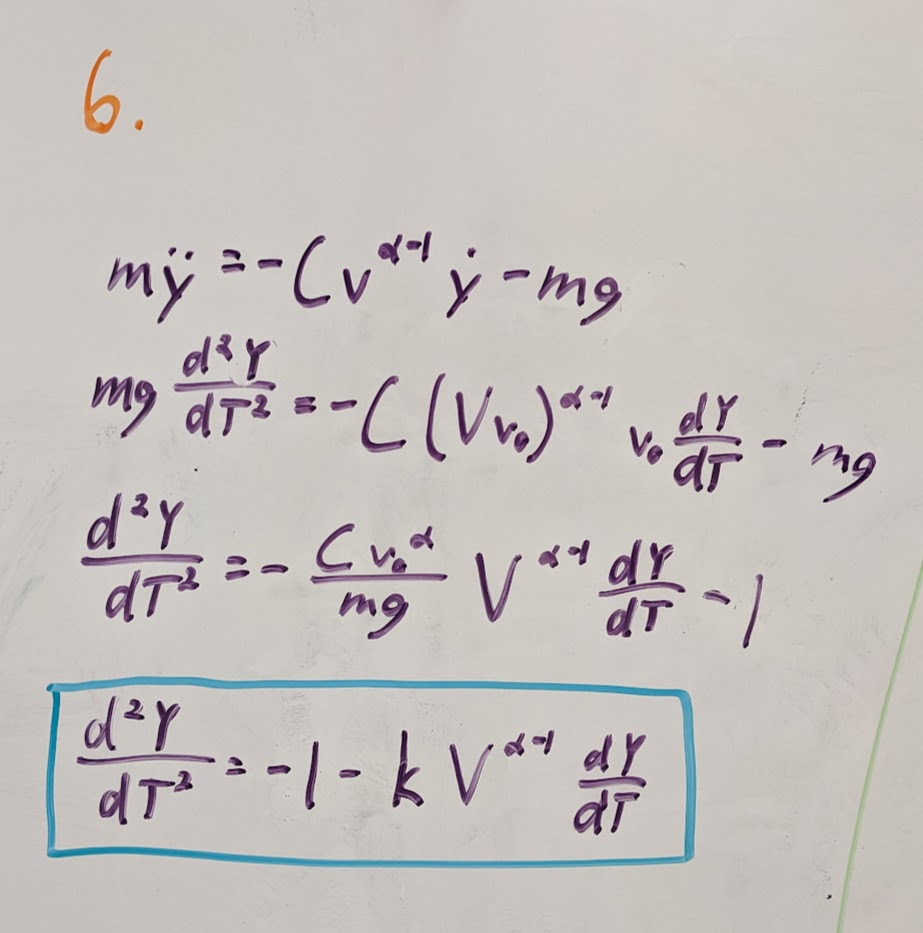

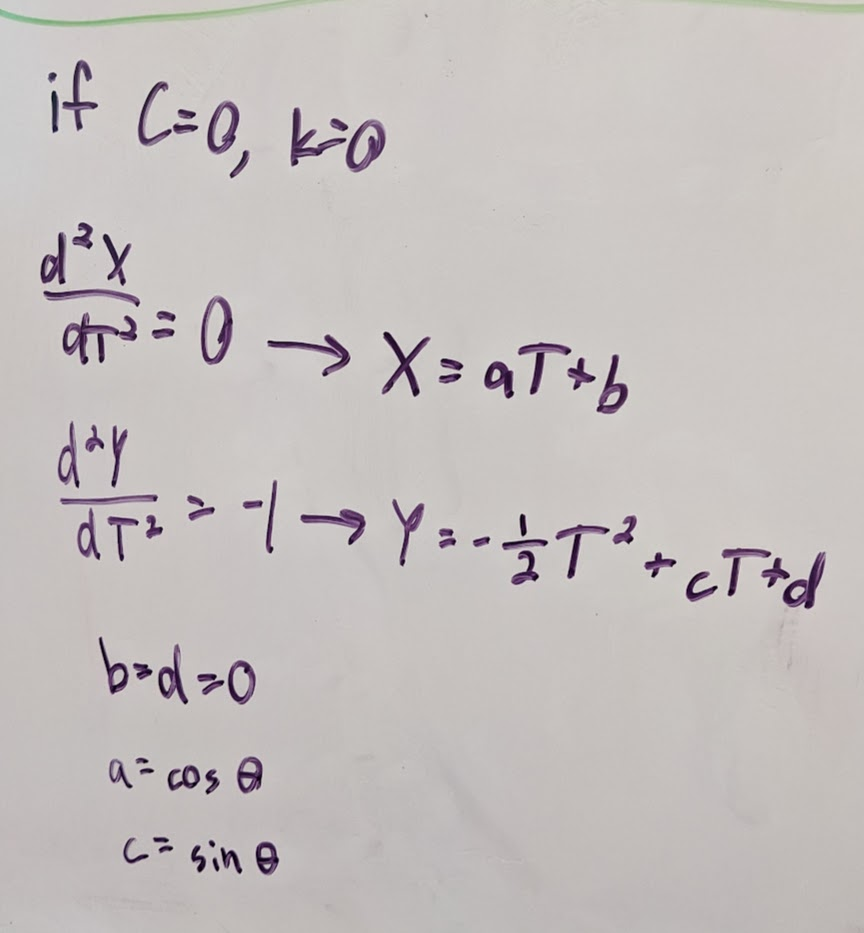

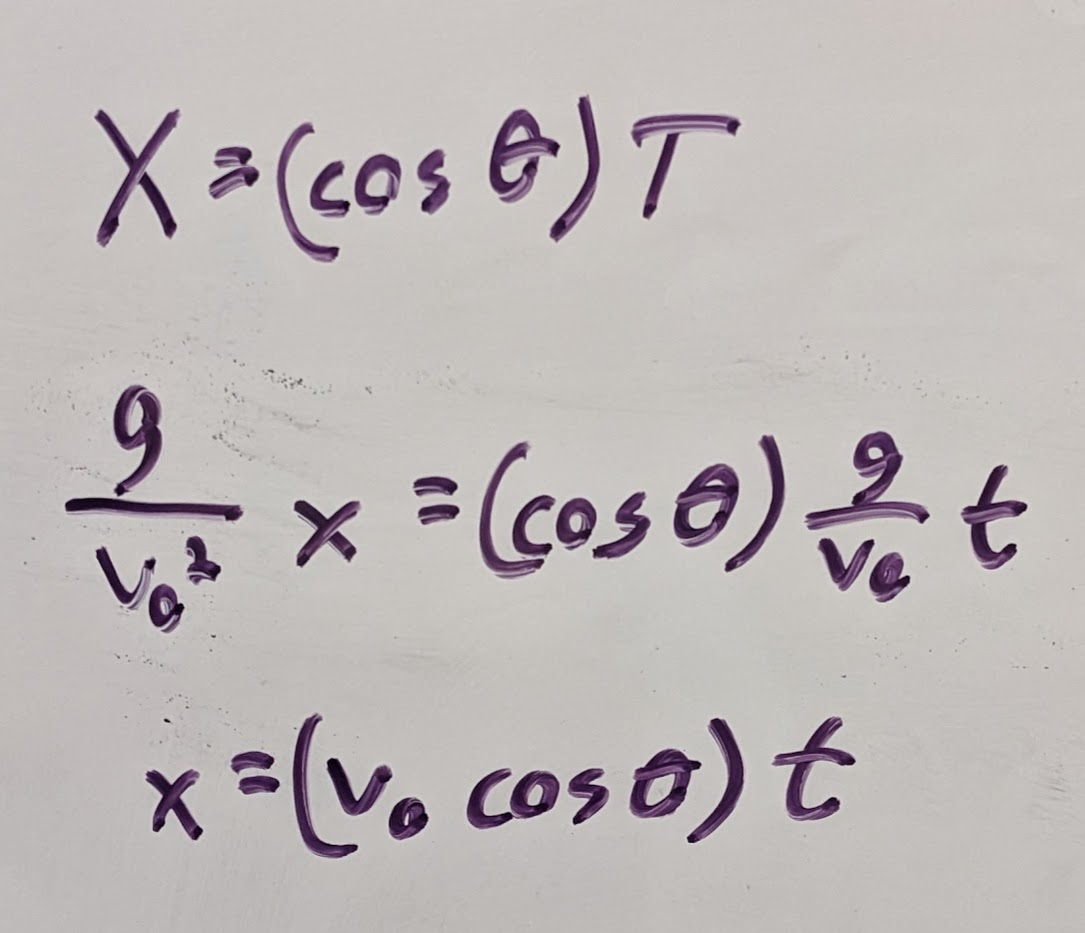

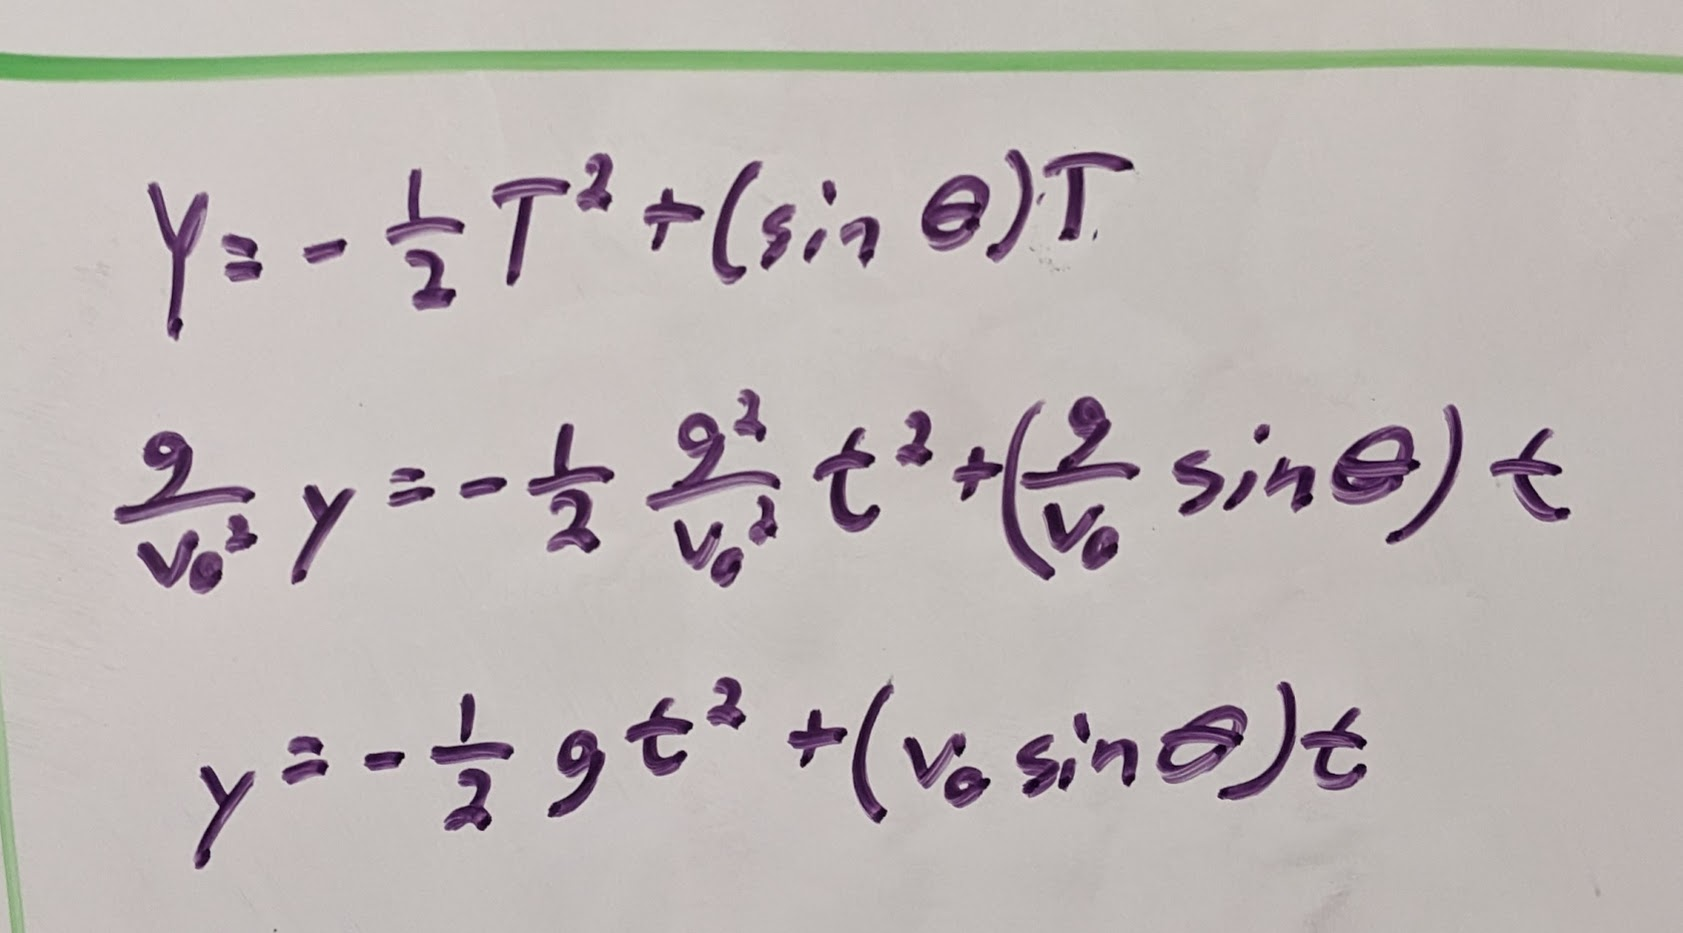

I got those new equations of motion that were on the homework sheet.

Now, to look at the case of no air resistance. $X$, $Y$, and $T$ are dimensionless, scaled quantities that represent $x$, $y$, and $t$ in a new form. There is no special physical meaning beyond being scaled representations. Notice that the $Y$ vs. $T$ equation has a maximum of 1, no matter which angle the projectile is launched from. This means that $Y = \frac{y}{y_{max}}$. Since the same scale applies for $x$, $X = \frac{x}{y_{max}}$. Finally, $T = \frac{t}{t_{max}}$ where $t_{max}$ is the time it takes for the projectile to reach $y_{max}$.

Next, I will use the 4th-order Runge-Kutta method to solve these trajectory equations, starting with $\alpha = 2$ and $\theta = \frac{\pi}{2}$.

In [20]:
#Note: everything in this box is universal for this problem

#Import modules
import numpy as np
import matplotlib.pyplot as plt

def RK4(xn, yn, dt, f, *args):
    k1 = dt*f(xn, yn, *args)
    k2 = dt*f(xn + dt/2, yn + k1/2, *args)
    k3 = dt*f(xn + dt/2, yn + k2/2, *args)
    k4 = dt*f(xn + dt, yn + k3, *args)
    
    #Return x_{n+1} and y_{n+1} as new x_n and y_n
    xn = xn + dt
    yn = yn + (k1 + 2*k2 + 2*k3 + k4)/6
    return xn, yn

#Differential equations
def ddX(T, d_X, d_Y, k, alpha):
    V = np.sqrt(d_X**2 + d_Y**2)
    return -k * V**(alpha-1) * d_X

def ddY(T, d_Y, d_X, k, alpha):
    V = np.sqrt(d_X**2 + d_Y**2)
    return -1 - k * V**(alpha-1) * d_Y

def dX(T, X, a):
    return a

def dY(T, Y, b):
    return b

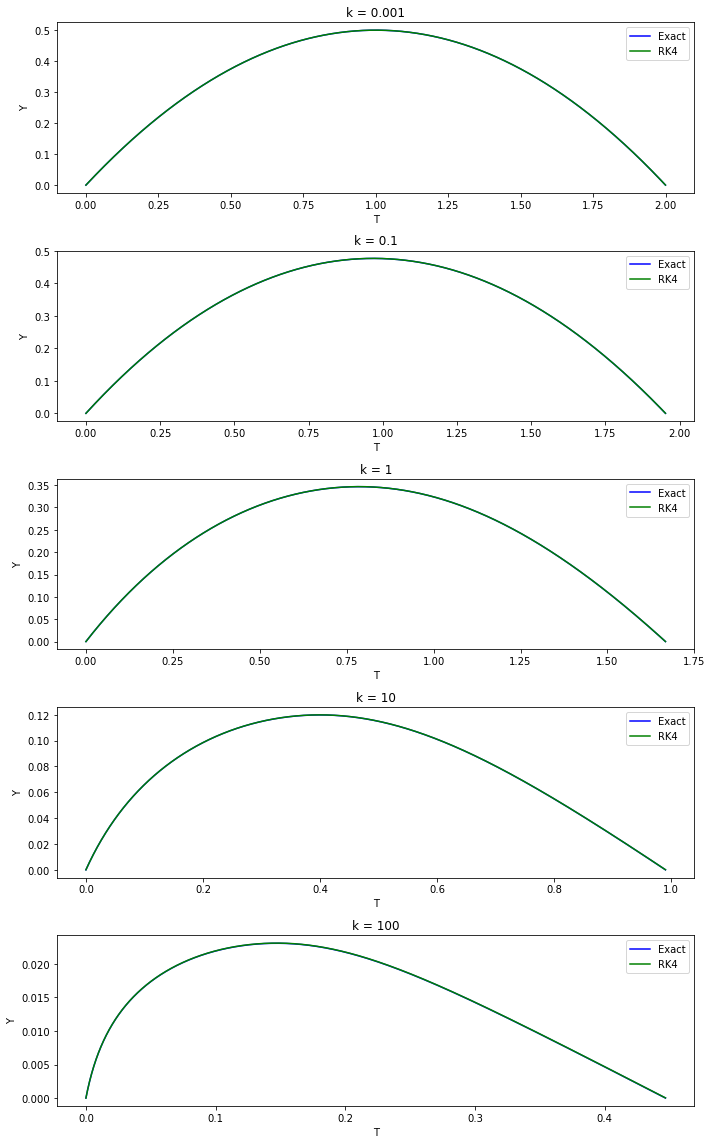

In [23]:
#Detail the exact solution
def exact(k):
    
    #Make constants
    Y_max = np.log(np.sqrt(1 + k))/k
    T_u = np.arctan(np.sqrt(k))/np.sqrt(k)
    T_d = np.arccosh(np.sqrt(1 + k))/np.sqrt(k)

    #Initiate arrays for output of function
    T = np.linspace(0, T_u + T_d, 10**4)
    Y = np.empty(10**4)
    
    #Build Y array with equations
    for i in range(10**4):
        if T[i] <= T_u:
            Y[i] = Y_max + np.log(np.cos(np.sqrt(k)*(T[i] - T_u)))/k
        else:
            Y[i] = Y_max - np.log(np.cosh(np.sqrt(k)*(T[i] - T_u)))/k
    
    return T, Y

#Start plots
fig, ax = plt.subplots(5, 1, figsize=(10, 16))

#Case 1
k = 0.001
T, Y_exact = exact(k)

#Make arrays for Y and dY (can ignore X because motion only in Y-dir.)
Y_approx = np.empty(10**4)
Y_approx[0] = 0
dY_approx = np.empty(10**4)
dY_approx[0] = 1
dX_approx = 0

for i in range(1, 10**4):
    dT = T[i] - T[i-1]
    throw, Y_approx[i] = RK4(T[i-1], Y_approx[i-1], dT, dY, dY_approx[i-1])
    throw, dY_approx[i] = RK4(T[i-1], dY_approx[i-1], dT, ddY, dX_approx, k, 2)

ax[0].plot(T, Y_exact, 'b-', label='Exact')
ax[0].plot(T, Y_approx, 'g-', label='RK4')
ax[0].set(xlabel='T', ylabel='Y', title='k = 0.001')
ax[0].legend()

#Case 2
k = 0.1
T, Y_exact = exact(k)

#Initial conditions are exactly same as above

for i in range(1, 10**4):
    dT = T[i] - T[i-1]
    throw, Y_approx[i] = RK4(T[i-1], Y_approx[i-1], dT, dY, dY_approx[i-1])
    throw, dY_approx[i] = RK4(T[i-1], dY_approx[i-1], dT, ddY, dX_approx, k, 2)

ax[1].plot(T, Y_exact, 'b-', label='Exact')
ax[1].plot(T, Y_approx, 'g-', label='RK4')
ax[1].set(xlabel='T', ylabel='Y', title='k = 0.1')
ax[1].legend()

#Case 3
k = 1
T, Y_exact = exact(k)

for i in range(1, 10**4):
    dT = T[i] - T[i-1]
    throw, Y_approx[i] = RK4(T[i-1], Y_approx[i-1], dT, dY, dY_approx[i-1])
    throw, dY_approx[i] = RK4(T[i-1], dY_approx[i-1], dT, ddY, dX_approx, k, 2)

ax[2].plot(T, Y_exact, 'b-', label='Exact')
ax[2].plot(T, Y_approx, 'g-', label='RK4')
ax[2].set(xlabel='T', ylabel='Y', title='k = 1')
ax[2].legend()

#Case 4
k = 10
T, Y_exact = exact(k)

for i in range(1, 10**4):
    dT = T[i] - T[i-1]
    throw, Y_approx[i] = RK4(T[i-1], Y_approx[i-1], dT, dY, dY_approx[i-1])
    throw, dY_approx[i] = RK4(T[i-1], dY_approx[i-1], dT, ddY, dX_approx, k, 2)

ax[3].plot(T, Y_exact, 'b-', label='Exact')
ax[3].plot(T, Y_approx, 'g-', label='RK4')
ax[3].set(xlabel='T', ylabel='Y', title='k = 10')
ax[3].legend()

#Case 5
k = 100
T, Y_exact = exact(k)

for i in range(1, 10**4):
    dT = T[i] - T[i-1]
    throw, Y_approx[i] = RK4(T[i-1], Y_approx[i-1], dT, dY, dY_approx[i-1])
    throw, dY_approx[i] = RK4(T[i-1], dY_approx[i-1], dT, ddY, dX_approx, k, 2)

ax[4].plot(T, Y_exact, 'b-', label='Exact')
ax[4].plot(T, Y_approx, 'g-', label='RK4')
ax[4].set(xlabel='T', ylabel='Y', title='k = 100')
ax[4].legend()

fig.tight_layout()
plt.show()

In all 5 cases, my numerical results appear exactly the same as the analytical results. That's probably in part because my step size was very small.



Now, I'll find the range of the projectile.

Range with k = 0.1: 0.928561765810755
Range with k = 1: 0.5892380020940113
Range with k = 10: 0.15984757849561265
Range with k = 100: 0.025919569995133406


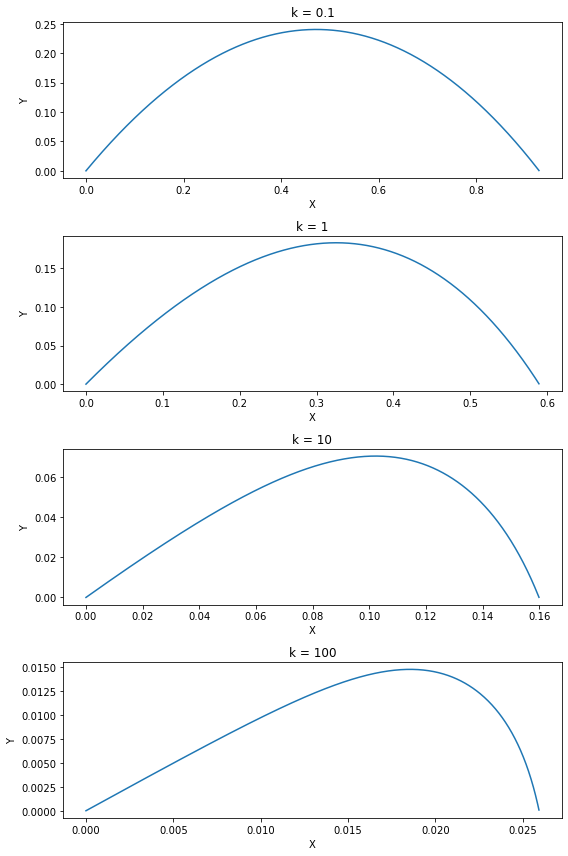

In [40]:
#Set direction of projectile (pi/4)
theta = np.pi/4

#Set dT (step size) to low value
dT = 0.001

#Start figures
fig, ax = plt.subplots(4, 1, figsize=(8, 12))

for i in range(4):
    T = 0
    
    #Make arrays
    X_app = [0]
    Y_app = [0]
    dX_app = [np.cos(theta)]
    dY_app = [np.sin(theta)]

    k = 10**(i-1)
    
    while Y_app[-1] >= 0:
        throw, X_app_next = RK4(T, X_app[-1], dT, dX, dX_app[-1])
        X_app.append(X_app_next)
        throw, dX_app_next = RK4(T, dX_app[-1], dT, ddX, dY_app[-1], k, 2)
        dX_app.append(dX_app_next)

        throw, Y_app_next = RK4(T, Y_app[-1], dT, dY, dY_app[-1])
        Y_app.append(Y_app_next)
        throw, dY_app_next = RK4(T, dY_app[-1], dT, ddY, dX_app[-2], k, 2)
        dY_app.append(dY_app_next)

        T = throw
    
    #Discard last entries (at negative Y)
    X_app = X_app[:-1]
    dX_app = dX_app[:-1]
    Y_app = Y_app[:-1]
    dY_app = dY_app[:-1]
    
    #Print range
    print('Range with k = ' + str(k) + ': ' + str(X_app[-1]))
    
    #Graph trajectories
    ax[i].plot(X_app, Y_app)
    ax[i].set(xlabel='X', ylabel='Y', title='k = ' + str(k))
    
    
fig.tight_layout()
plt.show()

Now, let's see the range vs. initial angle of the projectile's motion.

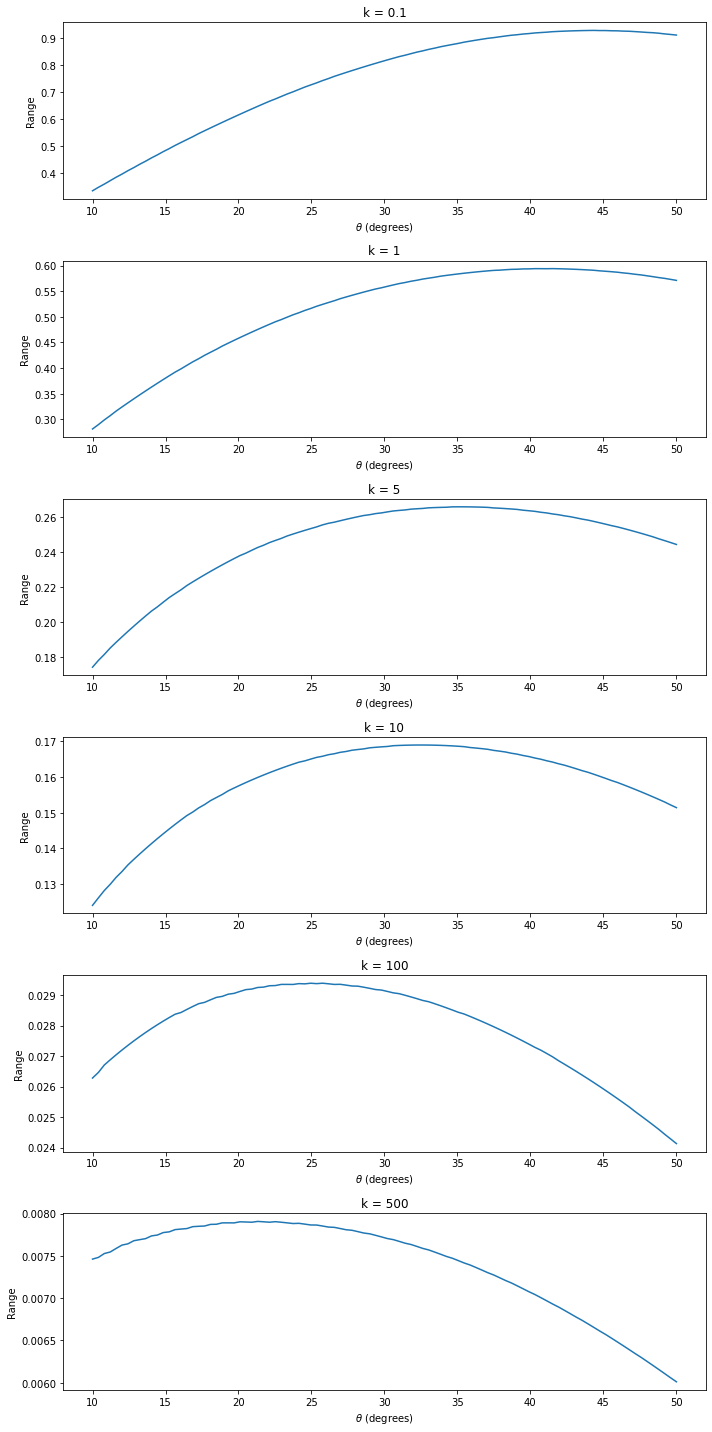

In [50]:
#Set alpha
alpha = 2

#Set dT (step size) to low value
dT = 0.001

#Start figures
fig, ax = plt.subplots(6, 1, figsize=(10, 20))

counter = 0
theta = np.linspace(10, 50, 100)
for k in [0.1, 1, 5, 10, 100, 500]:
    #Set range of X for dependent variable
    rangeX = np.empty(100)
    
    for i in range(100):
        T = 0

        #Make arrays
        X_app = [0]
        Y_app = [0]
        dX_app = [np.cos(np.radians(theta[i]))]
        dY_app = [np.sin(np.radians(theta[i]))]

        while Y_app[-1] >= 0:
            throw, X_app_next = RK4(T, X_app[-1], dT, dX, dX_app[-1])
            X_app.append(X_app_next)
            throw, dX_app_next = RK4(T, dX_app[-1], dT, ddX, dY_app[-1], k, alpha)
            dX_app.append(dX_app_next)

            throw, Y_app_next = RK4(T, Y_app[-1], dT, dY, dY_app[-1])
            Y_app.append(Y_app_next)
            throw, dY_app_next = RK4(T, dY_app[-1], dT, ddY, dX_app[-2], k, alpha)
            dY_app.append(dY_app_next)

            T = throw

        #Discard last entries (at negative Y)
        X_app = X_app[:-1]
        dX_app = dX_app[:-1]
        Y_app = Y_app[:-1]
        dY_app = dY_app[:-1]

        #Last X is range
        rangeX[i] = X_app[-1]
    
    #Graph trajectories
    ax[counter].plot(theta, rangeX)
    ax[counter].set(xlabel=r'$\theta$ (degrees)', ylabel='Range', title='k = ' + str(k))
        
    counter += 1
    
fig.tight_layout()
plt.show()

As air resistance increases, the launch angle for greatest distance decreases. When air resistance is added to the situation, projectiles that stay in the air for longer experience more slow down from drag. When looking at a pair of complementary angles, the smaller angle would be in the situation where the projectile goes farther. Overall, a smaller angle with less air time will help the ball go farther, within reason.

To see if my result from the last part is robust, I'll repeat it with $\alpha = 8$.

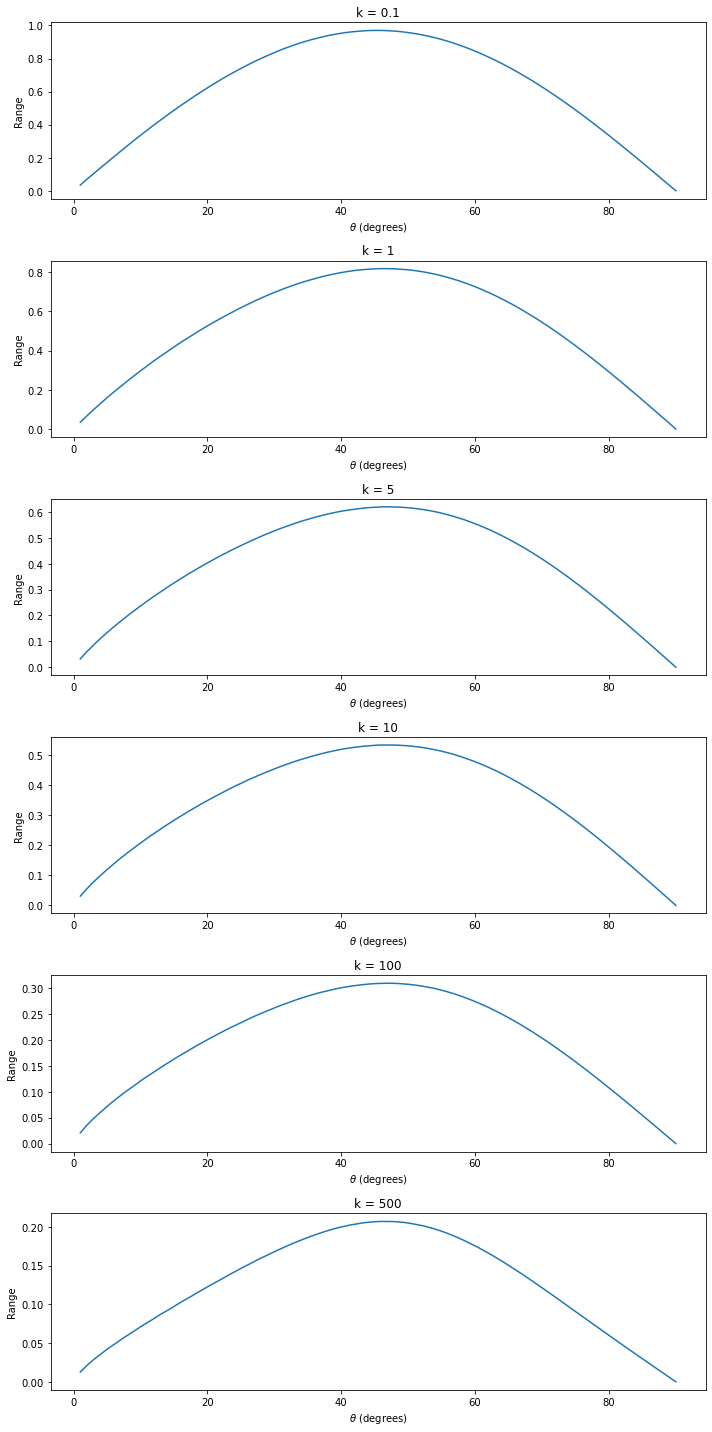

In [51]:
#Set alpha
alpha = 8

#Set dT (step size) to low value
dT = 0.001

#Start figures
fig, ax = plt.subplots(6, 1, figsize=(10, 20))

counter = 0
theta = np.linspace(1, 90, 100)
for k in [0.1, 1, 5, 10, 100, 500]:
    #Set range of X for dependent variable
    rangeX = np.empty(100)
    
    for i in range(100):
        T = 0

        #Make arrays
        X_app = [0]
        Y_app = [0]
        dX_app = [np.cos(np.radians(theta[i]))]
        dY_app = [np.sin(np.radians(theta[i]))]

        while Y_app[-1] >= 0:
            throw, X_app_next = RK4(T, X_app[-1], dT, dX, dX_app[-1])
            X_app.append(X_app_next)
            throw, dX_app_next = RK4(T, dX_app[-1], dT, ddX, dY_app[-1], k, alpha)
            dX_app.append(dX_app_next)

            throw, Y_app_next = RK4(T, Y_app[-1], dT, dY, dY_app[-1])
            Y_app.append(Y_app_next)
            throw, dY_app_next = RK4(T, dY_app[-1], dT, ddY, dX_app[-2], k, alpha)
            dY_app.append(dY_app_next)

            T = throw

        #Discard last entries (at negative Y)
        X_app = X_app[:-1]
        dX_app = dX_app[:-1]
        Y_app = Y_app[:-1]
        dY_app = dY_app[:-1]

        #Last X is range
        rangeX[i] = X_app[-1]
    
    #Graph trajectories
    ax[counter].plot(theta, rangeX)
    ax[counter].set(xlabel=r'$\theta$ (degrees)', ylabel='Range', title='k = ' + str(k))
        
    counter += 1
    
fig.tight_layout()
plt.show()

It doesn't seem like the coefficient of air resistance affects the optimal angle of launch.